In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, clear_output
from PIL import Image, ImageFilter

In [2]:
# image loading/unloading and displaying
imsize = 256
tranform_img = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()])

unload_img = transforms.ToPILImage()
# func to resize image and turn it into a tensor
def image_loader(address):
    image = Image.open(address)
    image = tranform_img(image)
    image = image[None]
    image = Variable(image)
    return image.to(torch.float)

def show_img(tensor):
    image = tensor.clone()
    image = image.squeeze(0)
    image = unload_img(image)
    image = image.resize((imsize * 2, imsize * 2))
    plt.imshow(image)

plt.ion()
def animate_output(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unload_img(image)
    clear_output(wait=True)
    display(image)

In [3]:
# calculate the difference between two tensors
def calc_loss(input_img, target_img, weight):
    return F.mse_loss(input_img, target_img)*weight

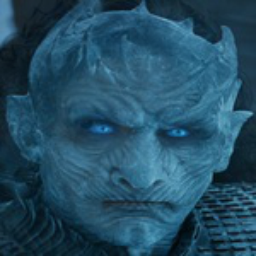

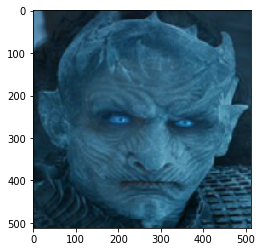

In [4]:
# Load input image (John Snow)
input_img = Variable(image_loader("data/snow_150x150.jpg"), requires_grad=True).to(torch.float)
# Load the target image (Night King)
target_img = image_loader("data/king_150x150.jpg")

# Fire up the Optimiser!
epochs = 120
num = 0
optimizer = optim.LBFGS([input_img], lr=0.015)
while num <= epochs:
    def closure():
        global num
        print(f"Num: {num}")
        optimizer.zero_grad()
        loss = calc_loss(input_img, target_img, 1000)
        loss.backward()
        print(loss)
        animate_output(input_img)
        num += 1
        return loss
    optimizer.step(closure)
show_img(input_img)